In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/Users/rajashree/Downloads/CSA-Data.csv")

In [4]:
df.head()

,"""Children are safe among family members such as grandparents, uncles, aunts, cousins""","""Children are mainly abused by strangers in our society""",Male children dont need sexual abuse prevention knowledge,"""Teaching sexual abuse prevention in school is not necessary. It will make children curious about sex""",Do you know what child grooming is?,Do you know what signs to look for to identify if your child has been abused?,Do you think children need post abuse counseling for recovering?,Do you think you should take legal action against the abuser of your child?,Knowledge Level
0,Agree,Agree,Disagree,Agree,No,No,No,Yes,Beginner
1,Agree,Agree,Disagree,Disagree,No,No,Yes,Yes,Beginner
2,Disagree,Disagree,Disagree,Disagree,No,No,Yes,Yes,Beginner
3,Agree,Agree,Disagree,Disagree,No,No,Yes,Yes,Beginner
4,Agree,Disagree,Disagree,Disagree,Yes,Yes,Yes,Yes,Intermediate


In [5]:
# checking null values 
df.isnull().sum()

"Children are safe among family members such as grandparents, uncles, aunts, cousins"                     0
"Children are mainly abused by strangers in our society"                                                  0
Male children dont need sexual abuse prevention knowledge                                                 0
"Teaching sexual abuse prevention in school is not necessary. It will make children curious about sex"    0
Do you know what child grooming is?                                                                       0
Do you know what signs to look for to identify if your child has been abused?                             0
Do you think children need post abuse counseling for recovering?                                          0
Do you think you should take legal action against the abuser of your child?                               0
Knowledge Level                                                                                           0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3002 entries, 0 to 3001
Data columns (total 9 columns):
 #   Column                                                                                                  Non-Null Count  Dtype 
---  ------                                                                                                  --------------  ----- 
 0   "Children are safe among family members such as grandparents, uncles, aunts, cousins"                   3002 non-null   object
 1   "Children are mainly abused by strangers in our society"                                                3002 non-null   object
 2   Male children dont need sexual abuse prevention knowledge                                               3002 non-null   object
 3   "Teaching sexual abuse prevention in school is not necessary. It will make children curious about sex"  3002 non-null   object
 4   Do you know what child grooming is?                                                              

In [12]:
# MAKING THE COLUMN NAMES READABLE 

df.columns = (
    df.columns.str.replace('"', '')         # Remove double quotes
              .str.strip()                  # Remove leading/trailing spaces
              .str.replace(' ', '_')        # Replace spaces with underscores
              .str.replace('?', '')         # Remove question marks
              .str.replace('.', '')         # Remove periods
              .str.lower()                  # Convert to lowercase
)

In [13]:
df.head()

,"children_are_safe_among_family_members_such_as_grandparents,_uncles,_aunts,_cousins",children_are_mainly_abused_by_strangers_in_our_society,male_children_dont_need_sexual_abuse_prevention_knowledge,teaching_sexual_abuse_prevention_in_school_is_not_necessary_it_will_make_children_curious_about_sex,do_you_know_what_child_grooming_is,do_you_know_what_signs_to_look_for_to_identify_if_your_child_has_been_abused,do_you_think_children_need_post_abuse_counseling_for_recovering,do_you_think_you_should_take_legal_action_against_the_abuser_of_your_child,knowledge_level
0,Agree,Agree,Disagree,Agree,No,No,No,Yes,Beginner
1,Agree,Agree,Disagree,Disagree,No,No,Yes,Yes,Beginner
2,Disagree,Disagree,Disagree,Disagree,No,No,Yes,Yes,Beginner
3,Agree,Agree,Disagree,Disagree,No,No,Yes,Yes,Beginner
4,Agree,Disagree,Disagree,Disagree,Yes,Yes,Yes,Yes,Intermediate


In [16]:
df.columns

Index(['children_are_safe_among_family_members_such_as_grandparents,_uncles,_aunts,_cousins',
       'children_are_mainly_abused_by_strangers_in_our_society',
       'male_children_dont_need_sexual_abuse_prevention_knowledge',
       'teaching_sexual_abuse_prevention_in_school_is_not_necessary_it_will_make_children_curious_about_sex',
       'do_you_know_what_child_grooming_is',
       'do_you_know_what_signs_to_look_for_to_identify_if_your_child_has_been_abused',
       'do_you_think_children_need_post_abuse_counseling_for_recovering',
       'do_you_think_you_should_take_legal_action_against_the_abuser_of_your_child',
       'knowledge_level'],
      dtype='object')

In [17]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
le = LabelEncoder()

# Apply encoding to all columns (including 'knowledge_level')
for col in df.columns:
    df[col] = le.fit_transform(df[col])

In [18]:
# Check what classes were mapped for 'knowledge_level'
le.classes_

array(['Beginner', 'Intermediate'], dtype=object)

In [19]:
df.dtypes

children_are_safe_among_family_members_such_as_grandparents,_uncles,_aunts,_cousins                    int64
children_are_mainly_abused_by_strangers_in_our_society                                                 int64
male_children_dont_need_sexual_abuse_prevention_knowledge                                              int64
teaching_sexual_abuse_prevention_in_school_is_not_necessary_it_will_make_children_curious_about_sex    int64
do_you_know_what_child_grooming_is                                                                     int64
do_you_know_what_signs_to_look_for_to_identify_if_your_child_has_been_abused                           int64
do_you_think_children_need_post_abuse_counseling_for_recovering                                        int64
do_you_think_you_should_take_legal_action_against_the_abuser_of_your_child                             int64
knowledge_level                                                                                        int64
dtype: object

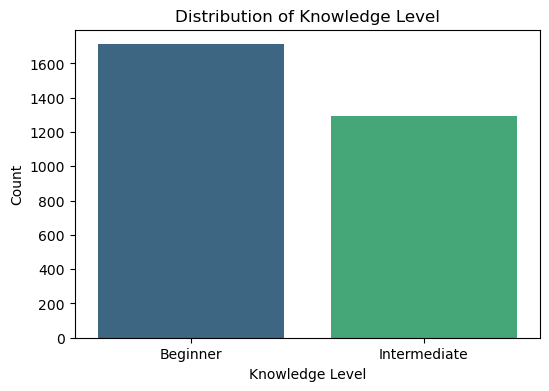

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the target variable (knowledge_level)
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='knowledge_level', palette='viridis')
plt.title('Distribution of Knowledge Level')
plt.xlabel('Knowledge Level')
plt.ylabel('Count')
plt.xticks([0, 1], ['Beginner', 'Intermediate'])
plt.show()

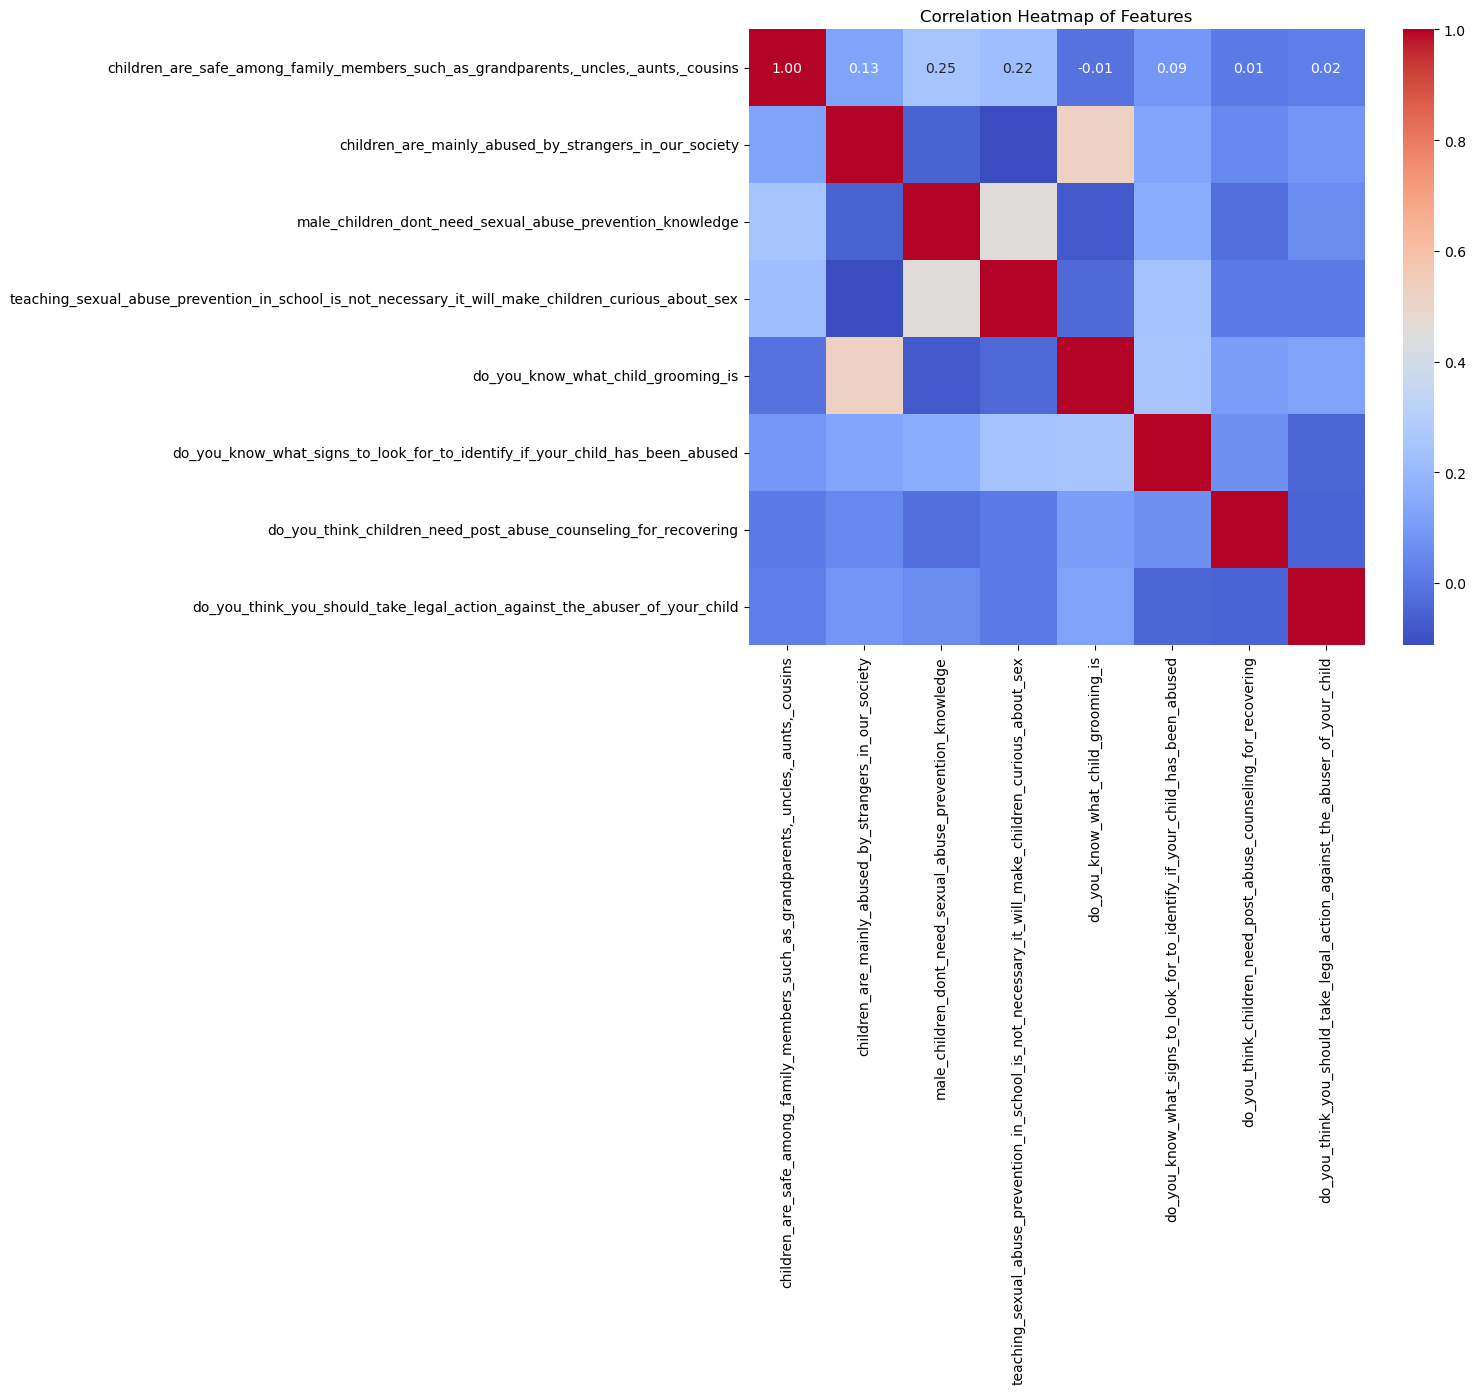

In [22]:
# Compute the correlation matrix
corr_matrix = df.drop('knowledge_level', axis=1).corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, square=True)
plt.title('Correlation Heatmap of Features')
plt.show()


In [20]:
# Features (everything except target)
X = df.drop('knowledge_level', axis=1)

# Target (what we want to predict)
y = df['knowledge_level']

In [21]:
from sklearn.model_selection import train_test_split

# Split data into training and testing (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
log_reg = LogisticRegression()

# Train the model on the training data
log_reg.fit(X_train, y_train)


LogisticRegression()

In [31]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Predict using the trained model

y_pred = log_reg.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 82.20%

Confusion Matrix:
[[271  56]
 [ 51 223]]


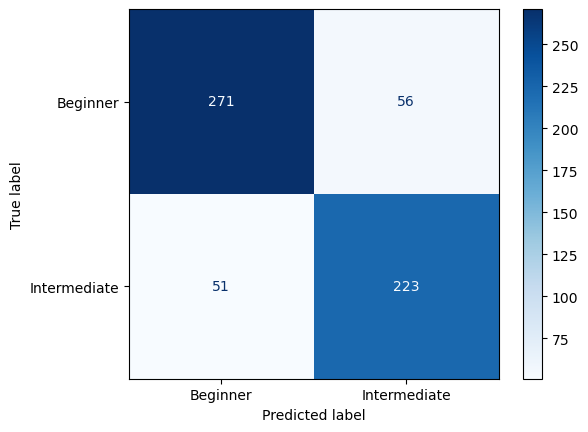

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Beginner', 'Intermediate'])

# Plot the confusion matrix with a nice color map
disp.plot(cmap='Blues')

# Show the plot
plt.show()


In [39]:
from sklearn.metrics import classification_report

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84       327
           1       0.80      0.81      0.81       274

    accuracy                           0.82       601
   macro avg       0.82      0.82      0.82       601
weighted avg       0.82      0.82      0.82       601



Decision Tree Accuracy: 92.68%

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       327
           1       0.90      0.94      0.92       274

    accuracy                           0.93       601
   macro avg       0.93      0.93      0.93       601
weighted avg       0.93      0.93      0.93       601



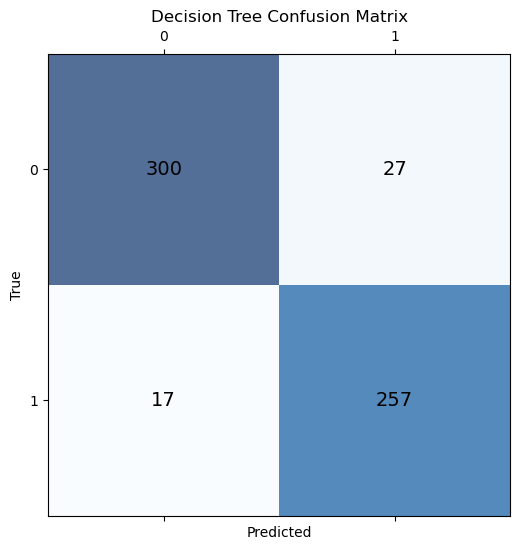

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Initialize the Decision Tree model
dtc = DecisionTreeClassifier(random_state=42)

# Train the model
dtc.fit(X_train, y_train)

# Predict the test set results
y_pred_dtc = dtc.predict(X_test)

# Evaluate accuracy
accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
print(f"Decision Tree Accuracy: {accuracy_dtc * 100:.2f}%")

# Classification report
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dtc))

# Confusion Matrix for Decision Tree
cm_dtc = confusion_matrix(y_test, y_pred_dtc)

# Plot Confusion Matrix for Decision Tree
fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(cm_dtc, cmap='Blues', alpha=0.7)
for (i, j), val in np.ndenumerate(cm_dtc):
    ax.text(j, i, f'{val}', ha='center', va='center', color='black', fontsize=14)
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Random Forest Accuracy: 92.51%

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       327
           1       0.90      0.94      0.92       274

    accuracy                           0.93       601
   macro avg       0.92      0.93      0.92       601
weighted avg       0.93      0.93      0.93       601



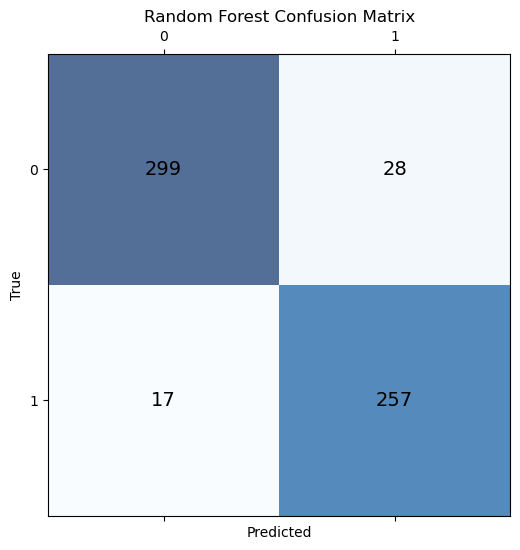

In [41]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rfc.fit(X_train, y_train)

# Predict the test set results
y_pred_rfc = rfc.predict(X_test)

# Evaluate accuracy
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
print(f"Random Forest Accuracy: {accuracy_rfc * 100:.2f}%")

# Classification report
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rfc))

# Confusion Matrix for Random Forest
cm_rfc = confusion_matrix(y_test, y_pred_rfc)

# Plot Confusion Matrix for Random Forest
fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(cm_rfc, cmap='Blues', alpha=0.7)
for (i, j), val in np.ndenumerate(cm_rfc):
    ax.text(j, i, f'{val}', ha='center', va='center', color='black', fontsize=14)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
